In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import warnings
warnings.filterwarnings("ignore")


from sklearn.cluster import *
from sklearn.decomposition import *

from sklearn.metrics import *

from sklearn.preprocessing import *
from sklearn.model_selection import *
from scipy.cluster.hierarchy import *

from sklearn.model_selection import *
from sklearn.preprocessing import *



#classification

from  sklearn.linear_model import LogisticRegression
 
from sklearn.tree import DecisionTreeClassifier

from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier,GradientBoostingClassifier

from xgboost import XGBClassifier

In [2]:
df = pd.read_csv("wisc_bc_data.csv")
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,points_worst,symmetry_worst,dimension_worst
0,87139402,B,12.32,12.39,78.85,464.1,0.10280,0.06981,0.03987,0.03700,...,13.50,15.64,86.97,549.1,0.1385,0.1266,0.12420,0.09391,0.2827,0.06771
1,8910251,B,10.60,18.95,69.28,346.4,0.09688,0.11470,0.06387,0.02642,...,11.88,22.94,78.28,424.8,0.1213,0.2515,0.19160,0.07926,0.2940,0.07587
2,905520,B,11.04,16.83,70.92,373.2,0.10770,0.07804,0.03046,0.02480,...,12.41,26.44,79.93,471.4,0.1369,0.1482,0.10670,0.07431,0.2998,0.07881
3,868871,B,11.28,13.39,73.00,384.8,0.11640,0.11360,0.04635,0.04796,...,11.92,15.77,76.53,434.0,0.1367,0.1822,0.08669,0.08611,0.2102,0.06784
4,9012568,B,15.19,13.21,97.65,711.8,0.07963,0.06934,0.03393,0.02657,...,16.20,15.73,104.50,819.1,0.1126,0.1737,0.13620,0.08178,0.2487,0.06766


In [3]:
df = df.drop("id",axis=1)

In [4]:
df=df.drop("diagnosis",axis=1)

In [5]:
df

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,points_mean,symmetry_mean,dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,points_worst,symmetry_worst,dimension_worst
0,12.32,12.39,78.85,464.1,0.10280,0.06981,0.03987,0.03700,0.1959,0.05955,...,13.50,15.64,86.97,549.1,0.1385,0.1266,0.12420,0.09391,0.2827,0.06771
1,10.60,18.95,69.28,346.4,0.09688,0.11470,0.06387,0.02642,0.1922,0.06491,...,11.88,22.94,78.28,424.8,0.1213,0.2515,0.19160,0.07926,0.2940,0.07587
2,11.04,16.83,70.92,373.2,0.10770,0.07804,0.03046,0.02480,0.1714,0.06340,...,12.41,26.44,79.93,471.4,0.1369,0.1482,0.10670,0.07431,0.2998,0.07881
3,11.28,13.39,73.00,384.8,0.11640,0.11360,0.04635,0.04796,0.1771,0.06072,...,11.92,15.77,76.53,434.0,0.1367,0.1822,0.08669,0.08611,0.2102,0.06784
4,15.19,13.21,97.65,711.8,0.07963,0.06934,0.03393,0.02657,0.1721,0.05544,...,16.20,15.73,104.50,819.1,0.1126,0.1737,0.13620,0.08178,0.2487,0.06766
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,13.17,18.22,84.28,537.3,0.07466,0.05994,0.04859,0.02870,0.1454,0.05549,...,14.90,23.89,95.10,687.6,0.1282,0.1965,0.18760,0.10450,0.2235,0.06925
565,10.26,14.71,66.20,321.6,0.09882,0.09159,0.03581,0.02037,0.1633,0.07005,...,10.88,19.48,70.89,357.1,0.1360,0.1636,0.07162,0.04074,0.2434,0.08488
566,15.28,22.41,98.92,710.6,0.09057,0.10520,0.05375,0.03263,0.1727,0.06317,...,17.80,28.03,113.80,973.1,0.1301,0.3299,0.36300,0.12260,0.3175,0.09772
567,14.53,13.98,93.86,644.2,0.10990,0.09242,0.06895,0.06495,0.1650,0.06121,...,15.80,16.93,103.10,749.9,0.1347,0.1478,0.13730,0.10690,0.2606,0.07810


In [6]:
df.isnull().sum()

radius_mean          0
texture_mean         0
perimeter_mean       0
area_mean            0
smoothness_mean      0
compactness_mean     0
concavity_mean       0
points_mean          0
symmetry_mean        0
dimension_mean       0
radius_se            0
texture_se           0
perimeter_se         0
area_se              0
smoothness_se        0
compactness_se       0
concavity_se         0
points_se            0
symmetry_se          0
dimension_se         0
radius_worst         0
texture_worst        0
perimeter_worst      0
area_worst           0
smoothness_worst     0
compactness_worst    0
concavity_worst      0
points_worst         0
symmetry_worst       0
dimension_worst      0
dtype: int64

In [7]:
df.skew()

radius_mean          0.942380
texture_mean         0.650450
perimeter_mean       0.990650
area_mean            1.645732
smoothness_mean      0.456324
compactness_mean     1.190123
concavity_mean       1.401180
points_mean          1.171180
symmetry_mean        0.725609
dimension_mean       1.304489
radius_se            3.088612
texture_se           1.646444
perimeter_se         3.443615
area_se              5.447186
smoothness_se        2.314450
compactness_se       1.902221
concavity_se         5.110463
points_se            1.444678
symmetry_se          2.195133
dimension_se         3.923969
radius_worst         1.103115
texture_worst        0.498321
perimeter_worst      1.128164
area_worst           1.859373
smoothness_worst     0.415426
compactness_worst    1.473555
concavity_worst      1.150237
points_worst         0.492616
symmetry_worst       1.433928
dimension_worst      1.662579
dtype: float64

In [8]:
df.columns.to_list()

['radius_mean',
 'texture_mean',
 'perimeter_mean',
 'area_mean',
 'smoothness_mean',
 'compactness_mean',
 'concavity_mean',
 'points_mean',
 'symmetry_mean',
 'dimension_mean',
 'radius_se',
 'texture_se',
 'perimeter_se',
 'area_se',
 'smoothness_se',
 'compactness_se',
 'concavity_se',
 'points_se',
 'symmetry_se',
 'dimension_se',
 'radius_worst',
 'texture_worst',
 'perimeter_worst',
 'area_worst',
 'smoothness_worst',
 'compactness_worst',
 'concavity_worst',
 'points_worst',
 'symmetry_worst',
 'dimension_worst']

In [9]:
columns = ['radius_mean',
 'texture_mean',
 'perimeter_mean',
 'area_mean',
 'smoothness_mean',
 'compactness_mean',
 'concavity_mean',
 'points_mean',
 'symmetry_mean',
 'dimension_mean',
 'radius_se',
 'texture_se',
 'perimeter_se',
 'area_se',
 'smoothness_se',
 'compactness_se',
 'concavity_se',
 'points_se',
 'symmetry_se',
 'dimension_se',
 'radius_worst',
 'texture_worst',
 'perimeter_worst',
 'area_worst',
 'smoothness_worst',
 'compactness_worst',
 'concavity_worst',
 'points_worst',
 'symmetry_worst',
 'dimension_worst']

In [10]:
ss = StandardScaler()

scaled_df = ss.fit_transform(df)
scaled_df = pd.DataFrame(scaled_df,columns=columns)
scaled_df

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,points_mean,symmetry_mean,dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,points_worst,symmetry_worst,dimension_worst
0,-0.513297,-1.605595,-0.540376,-0.542624,0.458285,-0.654413,-0.614306,-0.307442,0.538081,-0.460382,...,-0.573451,-1.634499,-0.604391,-0.582718,0.268776,-0.812128,-0.709978,-0.315133,-0.119321,-0.899721
1,-1.001801,-0.079038,-0.934566,-0.877375,0.036986,0.196319,-0.312987,-0.580343,0.402996,0.299453,...,-0.908925,-0.445740,-0.863230,-0.801227,-0.485202,-0.017590,-0.386625,-0.538203,0.063489,-0.447528
2,-0.876835,-0.572377,-0.867014,-0.801153,0.806996,-0.498443,-0.732448,-0.622129,-0.356400,0.085395,...,-0.799171,0.124213,-0.814083,-0.719308,0.198638,-0.674722,-0.793935,-0.613574,0.157320,-0.284606
3,-0.808671,-1.372888,-0.781338,-0.768161,1.426135,0.175472,-0.532950,-0.024740,-0.148296,-0.294523,...,-0.900641,-1.613330,-0.915355,-0.785054,0.189871,-0.458434,-0.889933,-0.433901,-1.292212,-0.892517
4,0.301824,-1.414775,0.234000,0.161860,-1.190618,-0.663320,-0.688883,-0.576473,-0.330843,-1.043018,...,-0.014328,-1.619844,-0.082245,-0.108082,-0.866574,-0.512506,-0.652408,-0.499832,-0.669366,-0.902492
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,-0.271884,-0.248914,-0.316713,-0.334435,-1.544310,-0.841464,-0.504827,-0.521532,-1.305645,-1.035930,...,-0.283535,-0.291038,-0.362232,-0.339247,-0.182734,-0.367466,-0.405815,-0.153883,-1.077047,-0.814381
565,-1.098366,-1.065715,-1.061432,-0.947908,0.175047,-0.241650,-0.665279,-0.736396,-0.652127,1.028102,...,-1.116007,-1.009179,-1.083347,-0.920238,0.159186,-0.576756,-0.962232,-1.124731,-0.755108,0.051769
566,0.327386,0.726127,0.286312,0.158448,-0.412068,0.016280,-0.440043,-0.420162,-0.308938,0.052790,...,0.317004,0.383135,0.194763,0.162637,-0.099446,0.481144,0.435670,0.121718,0.443667,0.763308
567,0.114375,-1.235591,0.077889,-0.030401,0.963560,-0.225920,-0.249208,0.413500,-0.590060,-0.225060,...,-0.097161,-1.424431,-0.123945,-0.229730,0.102199,-0.677266,-0.647131,-0.117340,-0.476850,-0.323951


# PCA

In [11]:
cov_mat = np.cov(scaled_df.T)     # covariance

In [12]:
eig_val,eig_vec = np.linalg.eig(cov_mat)  #eigen value and eigen vector

In [13]:
eig_val = list(eig_val)

In [14]:
percentage = []

for i in eig_val:
    per = (i/np.sum(eig_val))*100
    percentage.append(per)

In [15]:
cum_sum = np.cumsum(percentage)
cum_sum

array([ 44.27202561,  63.24320765,  72.63637091,  79.23850582,
        84.73427432,  88.75879636,  91.00953007,  92.59825387,
        93.98790324,  95.15688143,  96.13660042,  97.00713832,
        97.81166331,  98.33502905,  98.64881227,  98.91502161,
        99.1130184 ,  99.28841435,  99.45333965,  99.45378313,
        99.45627914,  99.46157694,  99.48457848,  99.51183728,
        99.56344152,  99.62362488,  99.704761  ,  99.79622568,
        99.90009035, 100.        ])

In [16]:
len(cum_sum[cum_sum<99.2])

17

In [17]:
pca = PCA(n_components=17,random_state=10)
pca

PCA(n_components=17, random_state=10)

In [18]:
pca_df =pca.fit_transform(scaled_df)

pca = pd.DataFrame(pca_df,columns=["pc1","pc2","pc3","pc4","pc5","pc6","pc7","pc8","pc9","pc10","pc11","pc12","pc13","pc14","pc15","pc16","pc17"])
pca

,pc1,pc2,pc3,pc4,pc5,pc6,pc7,pc8,pc9,pc10,pc11,pc12,pc13,pc14,pc15,pc16,pc17
0,-2.514876,0.114252,-0.496623,2.354347,-0.689375,-0.044259,-1.048426,-0.026297,0.506177,0.335009,-0.051326,-0.196036,-0.116205,0.062617,0.167863,0.039177,-0.089484
1,-1.464676,1.686632,1.169906,0.325662,-0.464873,1.248419,0.115766,0.144160,0.360972,-0.490694,-1.193391,0.016177,0.284562,0.203305,-0.071749,-0.027054,-0.407409
2,-2.926374,0.377332,-0.886794,-0.115345,-0.985680,-0.334456,-0.018665,-0.897151,0.189683,-0.399423,0.063425,0.376723,-0.260510,0.331835,-0.129666,0.242985,0.334135
3,-1.992035,1.329355,1.135245,2.046433,-0.252128,-1.757083,-1.395872,-0.618486,0.194024,0.078396,-0.971457,-0.910703,-0.218713,0.666275,0.102275,0.101466,0.205304
4,-2.499636,-2.018536,-0.731275,1.985023,1.135956,0.617819,-0.479727,0.220873,-0.323709,0.372074,-0.031893,-0.356165,0.148043,0.005467,-0.064908,-0.222226,-0.128244
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,-2.757430,-1.793919,-0.757814,0.024118,1.283912,-0.658833,-0.313234,0.595483,0.256924,-0.160192,-0.197201,-0.398268,0.073266,-0.277151,0.077127,0.417700,-0.305108
565,-2.431551,3.447204,3.456945,0.493660,-1.045757,-1.008840,-0.375565,0.933897,-1.950921,-0.649771,0.307482,-0.923800,-0.341709,-0.083046,-0.214390,-0.057788,-0.043634
566,-0.390019,-0.989242,-2.585169,-0.784527,0.734311,0.183738,0.691582,0.214829,-0.096870,0.460944,-0.073577,0.411428,0.182555,-0.091698,-0.092877,-0.491921,0.166873
567,-1.173831,-0.474840,-0.481571,2.143959,-0.243301,-0.482860,-0.507511,-0.405135,-0.553780,-0.173562,-0.331786,0.831554,-0.140296,0.066254,0.445665,0.044678,0.011137


# KMEANS

In [19]:
wcss = []


for i in range(2,11):
    kmeans_model = KMeans(n_clusters=i,random_state=1)
    kmeans_model.fit(pca)
    wcss.append(kmeans_model.inertia_)

In [20]:
wcss

[11444.369304326523,
 9910.885052445306,
 9114.113611283741,
 8403.874860074995,
 7816.00782803975,
 7395.1307672804905,
 7059.033076697777,
 6707.011197936881,
 6455.428466595251]

**elbow plot**

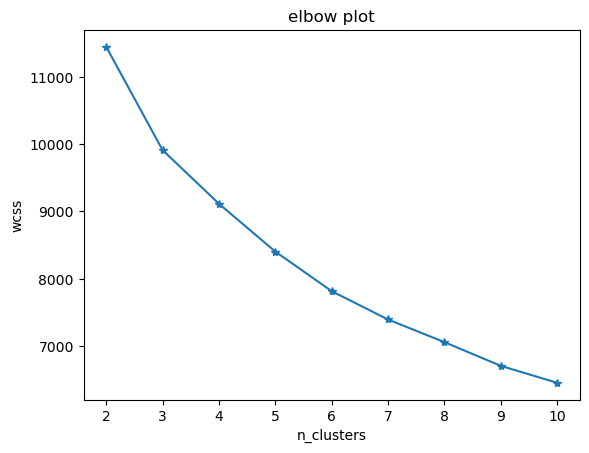

In [21]:
plt.plot(range(2,11),wcss,marker="*")
plt.xlabel("n_clusters")
plt.ylabel("wcss")
plt.title("elbow plot")
plt.show()

**silhouette score**

In [22]:
for i in range(2,11):
    Kmeans_model = KMeans(n_clusters=i,random_state=1)
    k_pred = Kmeans_model.fit_predict(pca)
    ss = silhouette_score(pca,k_pred,random_state=1)
    print(f" {i}--{ss}")

 2--0.34717114135940935
 3--0.3165046178432282
 4--0.27396281911483356
 5--0.1619903499955323
 6--0.16499010502350026
 7--0.15331270528547958
 8--0.146112230472173
 9--0.14914646199139076
 10--0.14414711208636563


In [23]:
Kmeans_model = KMeans(n_clusters=2,random_state=1)
Kmeans_model.fit(pca)
Kmeans_model.labels_

array([1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1,
       1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1,
       0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0,
       1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1,
       0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0,

In [24]:
Kmeans_model.cluster_centers_

array([[ 4.39306344e+00, -3.75691550e-02, -1.76864649e-01,
        -7.01769804e-02, -4.38460007e-04,  1.16299991e-02,
        -4.34810401e-02,  1.33114845e-02, -9.77500720e-03,
         9.15241165e-03,  3.14068750e-02,  3.48571147e-03,
        -3.23587325e-02, -3.22733930e-02,  2.15270972e-02,
        -2.73080101e-03, -2.82791907e-02],
       [-2.18497103e+00,  1.86857113e-02,  8.79668913e-02,
         3.49038140e-02,  2.18076161e-04, -5.78439428e-03,
         2.16260963e-02, -6.62071201e-03,  4.86177990e-03,
        -4.55212053e-03, -1.56207878e-02, -1.73368281e-03,
         1.60942117e-02,  1.60517665e-02, -1.07068983e-02,
         1.35821419e-03,  1.40651764e-02]])

In [25]:
len((pd.Series(Kmeans_model.labels_)).unique())

2

In [26]:
pca["KMEANS"]=Kmeans_model.labels_

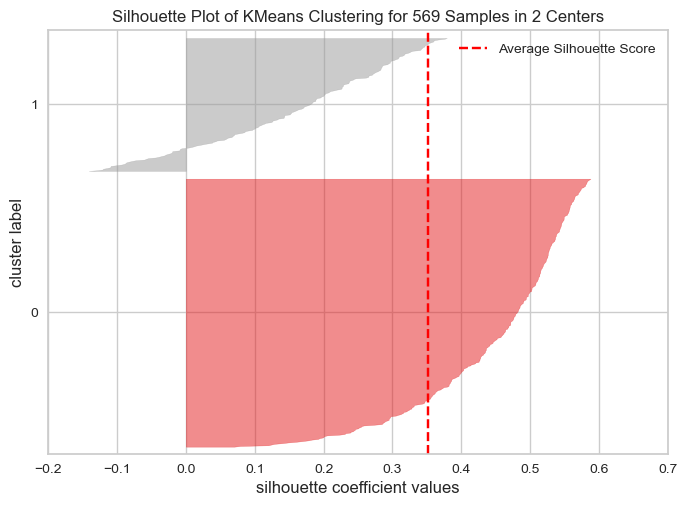

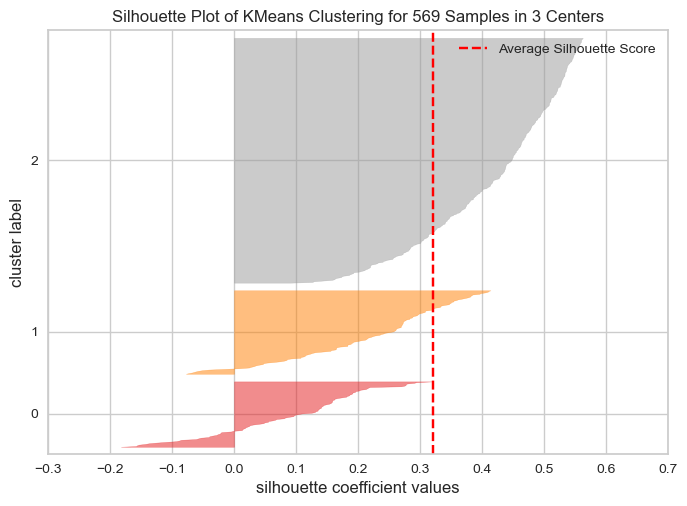

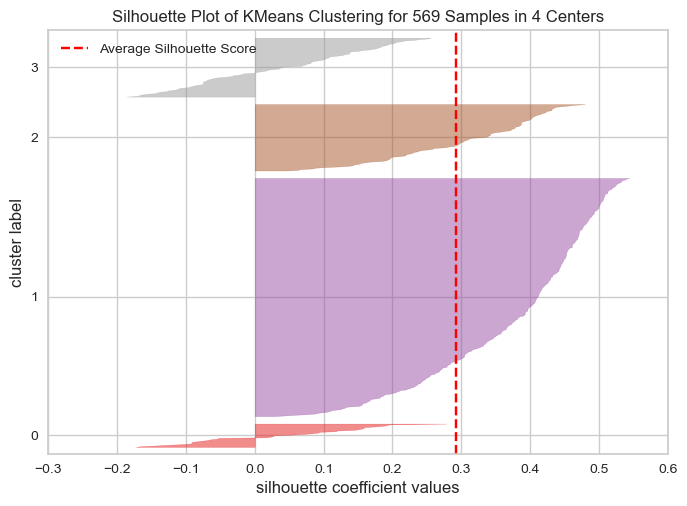

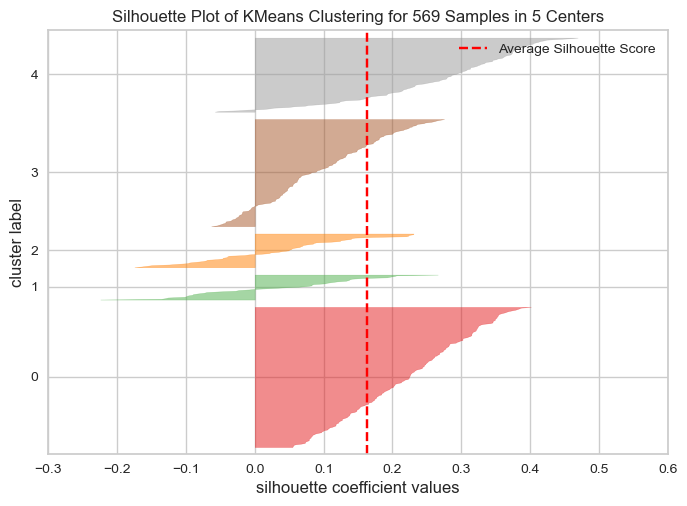

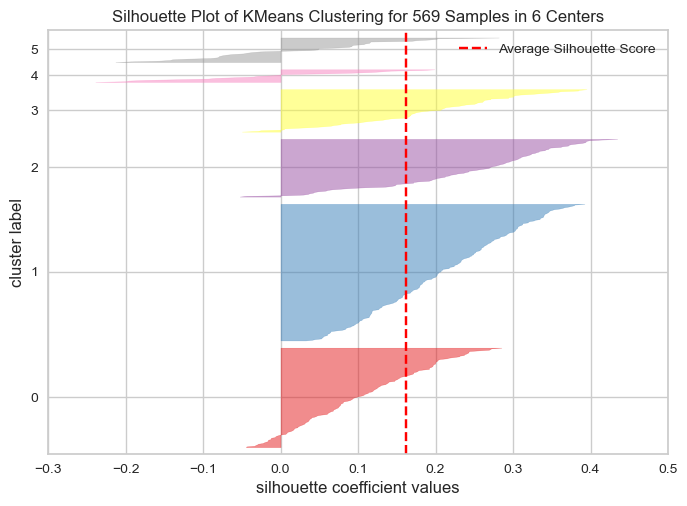

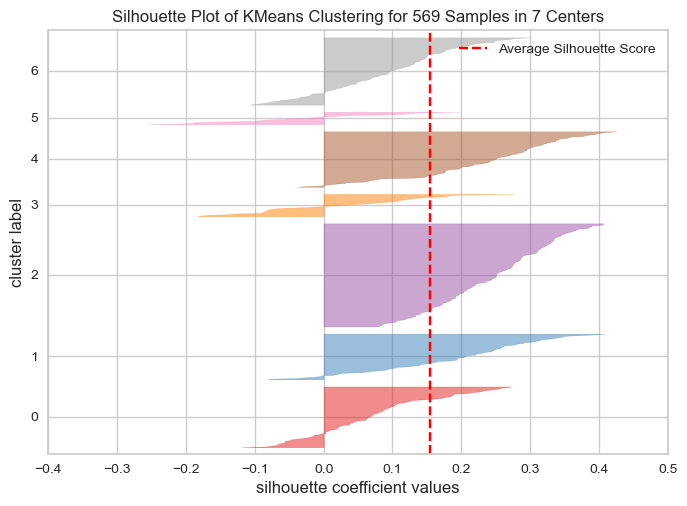

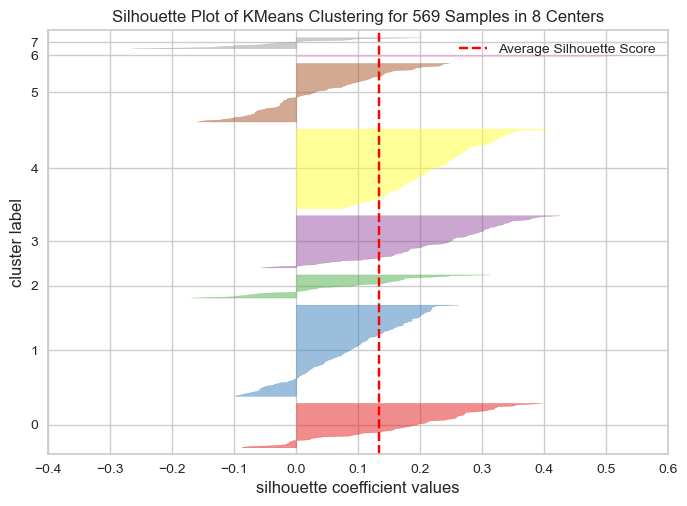

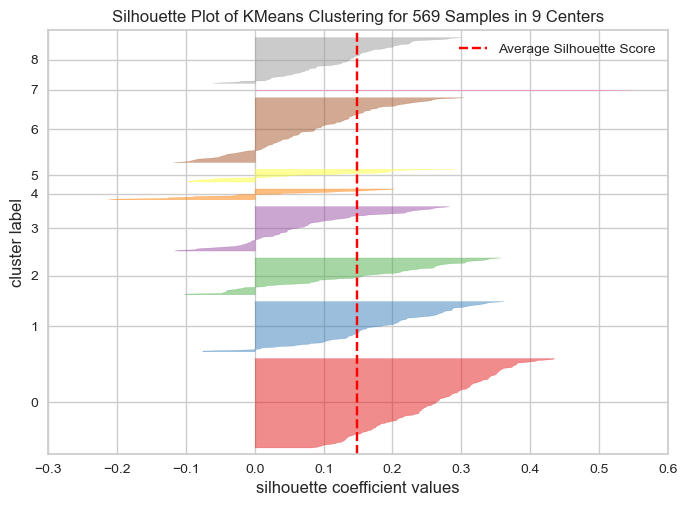

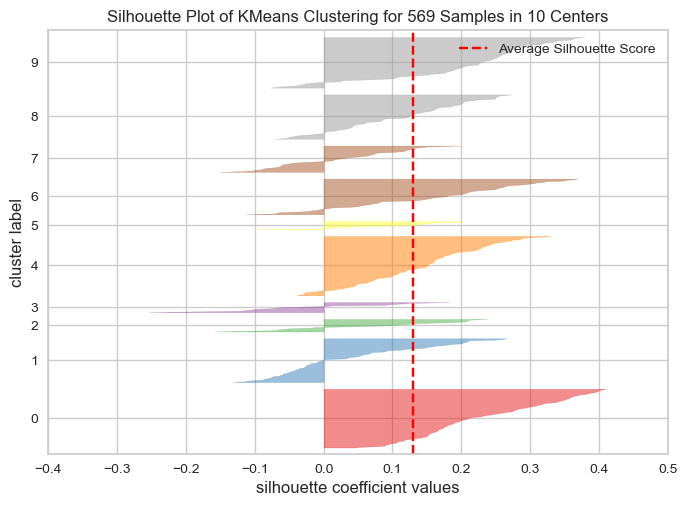

In [28]:
from yellowbrick.cluster import SilhouetteVisualizer
for i in range(2,11):
    kmeans_model = KMeans(n_clusters=i, random_state=0)
    sviz = SilhouetteVisualizer(kmeans_model, color="yellowbrick")
    sviz.fit(pca)
    sviz.show()

# AGGLOMERATIVE CLUSTERING

In [29]:
link =linkage(pca,method="ward")
link

array([[1.75000000e+02, 5.47000000e+02, 8.86081217e-01, 2.00000000e+00],
       [9.30000000e+01, 5.54000000e+02, 9.95402260e-01, 2.00000000e+00],
       [3.58000000e+02, 4.75000000e+02, 1.04585154e+00, 2.00000000e+00],
       ...,
       [1.12200000e+03, 1.13000000e+03, 3.89386654e+01, 1.18000000e+02],
       [1.13300000e+03, 1.13400000e+03, 5.52362798e+01, 2.03000000e+02],
       [1.13200000e+03, 1.13500000e+03, 1.04363641e+02, 5.69000000e+02]])

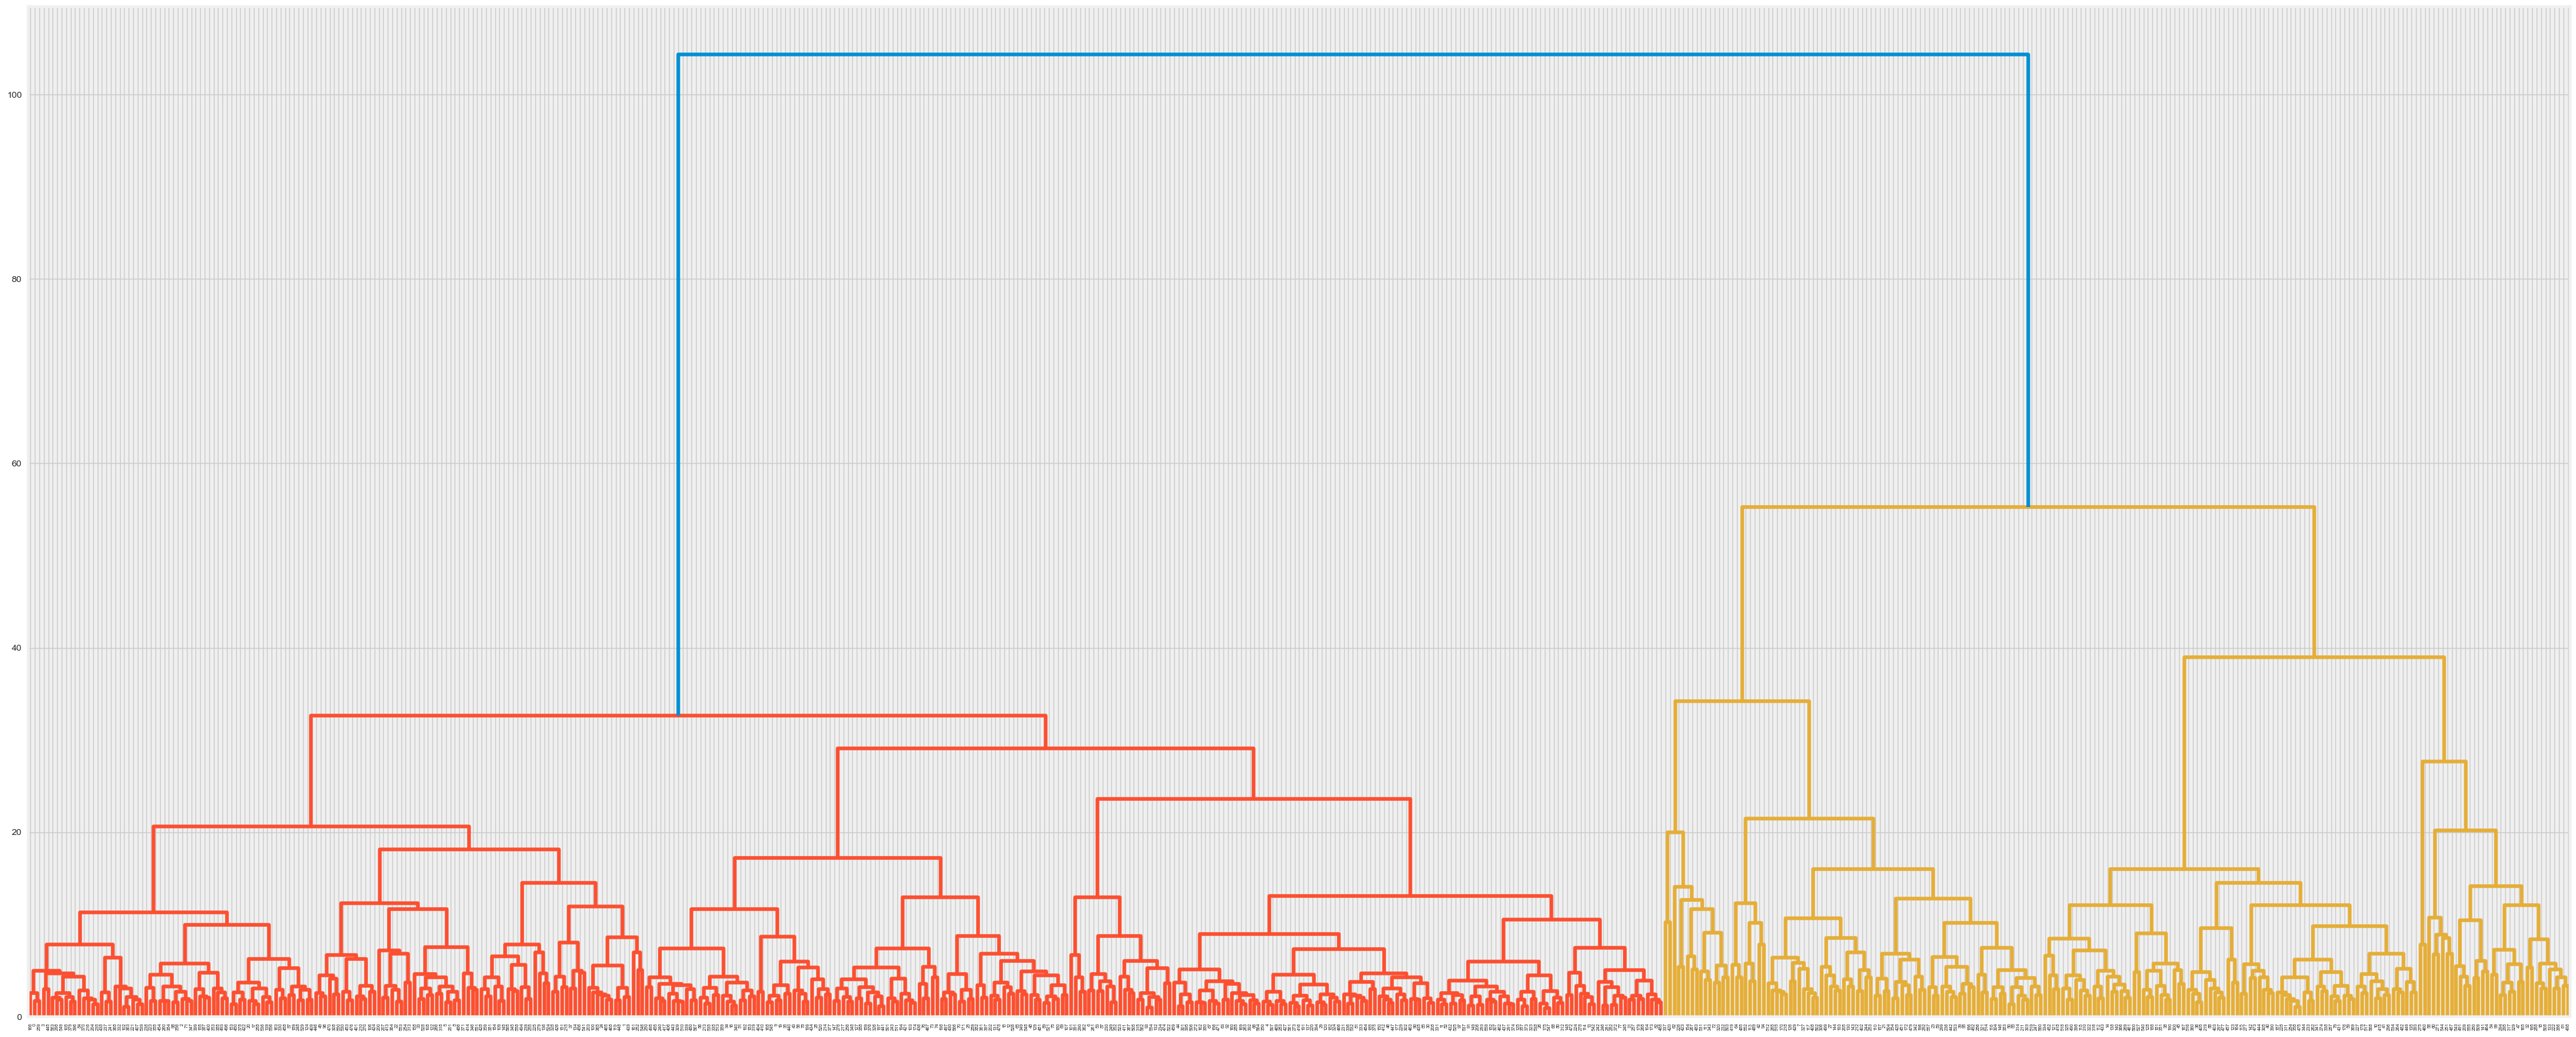

In [30]:
plt.figure(figsize=(50,20))
plt.style.use("fivethirtyeight")
dendrogram(link)
plt.show()

In [31]:
for i in range(2,11):
    kmeans_model = Agglomerative(n_clusters=i)
    k_pred = kmeans_model.fit_transform(pca)
    sc = silhouette_score(pca,k_pred)
    print(f"{i}--{sc}")

2--0.352165786904186
3--0.32019821838573176
4--0.27967114003929106
5--0.1628467108649227
6--0.16496130146348473
7--0.15636633037336758
8--0.16060733529564905
9--0.14767906818453694
10--0.1475820586686441


In [32]:
agg_model = AgglomerativeClustering(n_clusters=2)

agg_model = agg_model.fit(pca)
agg_model.labels_

array([1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0,
       1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1,
       0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0,
       1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1,
       0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0,

In [33]:
pca["AGGLOMERATIVE"] = agg_model.labels_

# DBSCAN

In [34]:
dbscan = DBSCAN(eps = 1.4,min_samples=4)
db_pred = dbscan.fit_predict(pca)
db_pred

array([-1, -1, -1, -1,  1, -1, -1, -1, -1, -1, -1,  0, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1,  0, -1, -1,  0, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1,  0, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,  1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1,  0, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
        2, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1,  0, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1,  0, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,  0,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1,  0, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1,  0, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1,  0, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,  0,
        2, -1, -1, -1, -1

In [35]:
pca["dbscan"]=db_pred

# plotting

In [36]:
pca

,pc1,pc2,pc3,pc4,pc5,pc6,pc7,pc8,pc9,pc10,pc11,pc12,pc13,pc14,pc15,pc16,pc17,KMEANS,AGGLOMERATIVE,dbscan
0,-2.514876,0.114252,-0.496623,2.354347,-0.689375,-0.044259,-1.048426,-0.026297,0.506177,0.335009,-0.051326,-0.196036,-0.116205,0.062617,0.167863,0.039177,-0.089484,1,1,-1
1,-1.464676,1.686632,1.169906,0.325662,-0.464873,1.248419,0.115766,0.144160,0.360972,-0.490694,-1.193391,0.016177,0.284562,0.203305,-0.071749,-0.027054,-0.407409,1,1,-1
2,-2.926374,0.377332,-0.886794,-0.115345,-0.985680,-0.334456,-0.018665,-0.897151,0.189683,-0.399423,0.063425,0.376723,-0.260510,0.331835,-0.129666,0.242985,0.334135,1,1,-1
3,-1.992035,1.329355,1.135245,2.046433,-0.252128,-1.757083,-1.395872,-0.618486,0.194024,0.078396,-0.971457,-0.910703,-0.218713,0.666275,0.102275,0.101466,0.205304,1,1,-1
4,-2.499636,-2.018536,-0.731275,1.985023,1.135956,0.617819,-0.479727,0.220873,-0.323709,0.372074,-0.031893,-0.356165,0.148043,0.005467,-0.064908,-0.222226,-0.128244,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,-2.757430,-1.793919,-0.757814,0.024118,1.283912,-0.658833,-0.313234,0.595483,0.256924,-0.160192,-0.197201,-0.398268,0.073266,-0.277151,0.077127,0.417700,-0.305108,1,1,-1
565,-2.431551,3.447204,3.456945,0.493660,-1.045757,-1.008840,-0.375565,0.933897,-1.950921,-0.649771,0.307482,-0.923800,-0.341709,-0.083046,-0.214390,-0.057788,-0.043634,1,1,-1
566,-0.390019,-0.989242,-2.585169,-0.784527,0.734311,0.183738,0.691582,0.214829,-0.096870,0.460944,-0.073577,0.411428,0.182555,-0.091698,-0.092877,-0.491921,0.166873,1,1,-1
567,-1.173831,-0.474840,-0.481571,2.143959,-0.243301,-0.482860,-0.507511,-0.405135,-0.553780,-0.173562,-0.331786,0.831554,-0.140296,0.066254,0.445665,0.044678,0.011137,1,1,-1


In [37]:
pca["KMEANS"].unique()

array([1, 0])

In [38]:
pca["AGGLOMERATIVE"].unique()

array([1, 0], dtype=int64)

In [39]:
pca["dbscan"].unique()

array([-1,  1,  0,  2], dtype=int64)

In [40]:
plt.rcParams["figure.figsize"]=[20,10]

<Axes: xlabel='pc1', ylabel='pc2'>

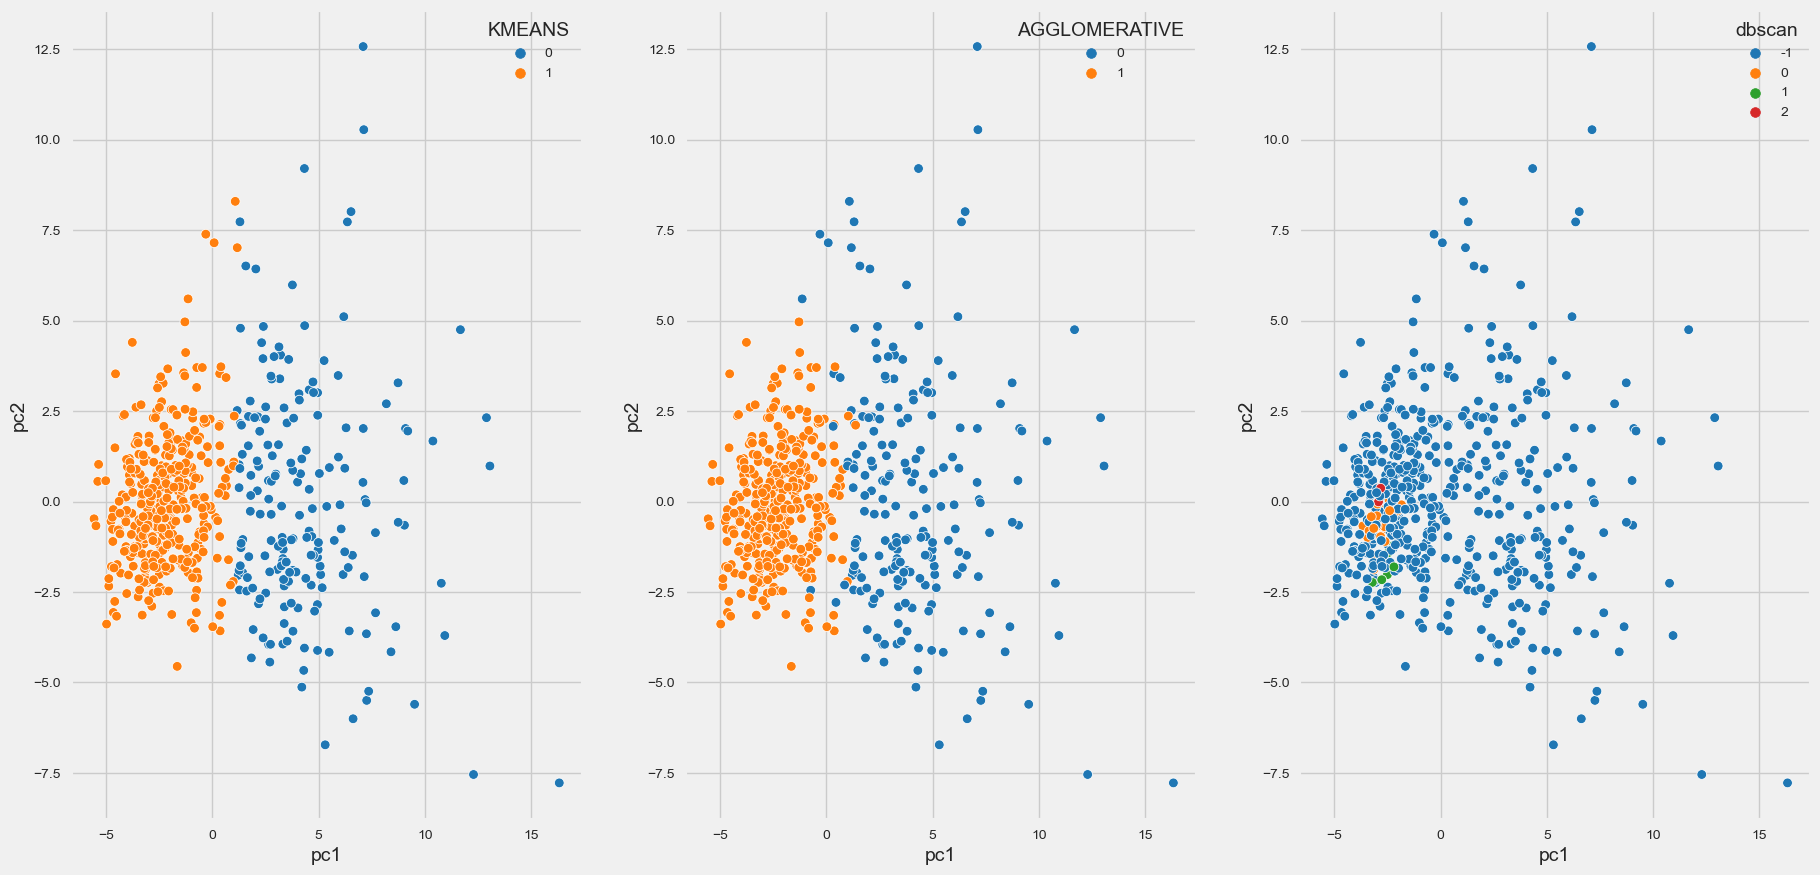

In [41]:
plt.subplot(1,3,1)

sns.scatterplot(x=pca["pc1"],y=pca["pc2"],hue=pca["KMEANS"],palette="tab10")

plt.subplot(1,3,2)

sns.scatterplot(x=pca["pc1"],y=pca["pc2"],hue=pca["AGGLOMERATIVE"],palette="tab10")

plt.subplot(1,3,3)

sns.scatterplot(x=pca["pc1"],y=pca["pc2"],hue=pca["dbscan"],palette="tab10")

In [42]:
pca.dbscan.value_counts(normalize=True)*100

-1    94.376098
 0     3.866432
 1     1.054482
 2     0.702988
Name: dbscan, dtype: float64

In [43]:
pca.KMEANS.value_counts(normalize=True)*100

1    66.783831
0    33.216169
Name: KMEANS, dtype: float64

In [44]:
pca.AGGLOMERATIVE.value_counts(normalize=True)*100

1    64.323374
0    35.676626
Name: AGGLOMERATIVE, dtype: float64

# MODEL BUILDING

In [45]:
x = pca.drop(["KMEANS","dbscan","AGGLOMERATIVE"],axis=1)
y = pca["KMEANS"]

xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size=0.3,random_state=1)

print(xtrain.shape,xtest.shape,ytrain.shape,ytest.shape)

(398, 17) (171, 17) (398,) (171,)


In [46]:
model = {"Logistic_regression" : LogisticRegression(),
         "DecisionTreeClassifier": DecisionTreeClassifier(),
        "RandomForestClassifier": RandomForestClassifier(),
        "AdaboostClassifier": AdaBoostClassifier(),
        "GradientBoostingClassifier": GradientBoostingClassifier(),
        "XGBoostClassifier": XGBClassifier()}

model_report = pd.DataFrame(columns = ["model","accuracy","precision","recall","f1score"])

for clf,clf_names in zip(model.values(),model.keys()):
    clf.fit(xtrain,ytrain)
    ypred = clf.predict(xtest)
    t = {"model" : clf_names,
        "accuracy" : accuracy_score(ytest,ypred),
        "precision" : precision_score(ytest,ypred),
        "recall" : recall_score(ytest,ypred),
        "f1score":f1_score(ytest,ypred)}
    model_report = model_report.append(t,ignore_index=True)
model_report  

,model,accuracy,precision,recall,f1score
0,Logistic_regression,0.988304,1.0,0.982906,0.991379
1,DecisionTreeClassifier,0.994152,1.0,0.991453,0.995708
2,RandomForestClassifier,0.994152,1.0,0.991453,0.995708
3,AdaboostClassifier,0.994152,1.0,0.991453,0.995708
4,GradientBoostingClassifier,0.994152,1.0,0.991453,0.995708
5,XGBoostClassifier,0.994152,1.0,0.991453,0.995708


# hyperparameter tuning

In [47]:
rf = RandomForestClassifier()

params= {"criterion":["entropy","gini"], "max_depth":[2,3,4],"min_samples_split":[2,3,4],"min_samples_leaf":[2,3,4]}

rf_gcv = GridSearchCV(rf,param_grid = params)


In [48]:
rf_gcv.fit(xtrain,ytrain)
rf_gcv.best_params_

{'criterion': 'entropy',
 'max_depth': 2,
 'min_samples_leaf': 2,
 'min_samples_split': 4}

In [49]:
rf = RandomForestClassifier(criterion = "entropy",max_depth= 2,min_samples_leaf= 2,min_samples_split= 2)

rf.fit(xtrain,ytrain)
ypred = rf.predict(xtest)

print("accuracy: " ,accuracy_score(ytest,ypred))
print("precision :" ,precision_score(ytest,ypred))
print("recall : " ,recall_score(ytest,ypred))
print("f1score: ", f1_score(ytest,ypred))

accuracy:  0.9941520467836257
precision : 1.0
recall :  0.9914529914529915
f1score:  0.9957081545064378
